In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
path = "../Data_Sets_for_Final_Projects/Carbon-Data-ALPIDE-CHIP-Longitudinal/151218_04237.csv"
#df = pd.read_csv(path)
df = pd.read_csv(path,
                 converters={"column": lambda vol: vol.strip("[]").split(";"),
                             "row": lambda vol: vol.strip("[]").split(";") })

* 판다스에서 데이터를 읽을 때 세미콜론으로 나눠져 있는 데이터를 리스트형으로 분할하는 방법
    * pd.read_csv()에서 converters옵션에서 lambda식과 내장함수들을 통해 사용하기

In [35]:
df.head(n=20)

,ru_id,frame_id,stave_id,chip_id,abs_time,bunch_counter,column,row
0,1,1.0,0,5,3.949260e+09,54,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
1,1,2.0,0,5,3.949380e+09,154,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
2,1,3.0,0,5,3.949500e+09,64,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
3,1,6.0,0,5,3.949860e+09,106,[829],[478]
4,1,14.0,0,5,3.950820e+09,11,"[957, 957, 958, 958]","[421, 422, 421, 422]"
5,1,39.0,0,5,3.953820e+09,82,"[797, 796, 796, 797]","[353, 353, 354, 354]"
6,1,75.0,0,5,3.958140e+09,100,[829],[478]
7,1,92.0,0,5,3.960180e+09,9,"[268, 268, 269, 269, 268]","[129, 130, 130, 131, 131]"
8,1,121.0,0,5,3.963660e+09,222,[866],[346]
9,1,143.0,0,5,3.966300e+09,183,"[445, 444, 444, 445, 446, 446, 447, 447, 446]","[343, 343, 344, 344, 343, 344, 344, 345, 345]"


가설을 만든 후 검증한다.

* 'ru_id'는 항상 `1`
* 'stave_id'는 항상 `0`
* 'chip_id'는 항상 `5`

In [36]:
df['ru_id'].unique()

array([1], dtype=int64)

In [37]:
assert df['ru_id'].unique() == 1
assert df['stave_id'].unique() == 0
assert df['chip_id'].unique() == 5

* assert문에서 에러가 발생하지 않았으므로 모두 참이다.
* 'ru_id', 'stave_id', 'chip_id'는 항상 같은 값을 가지므로 유용한 정보가 없다. 따라서 drop한다.

In [38]:
df.drop(['ru_id', 'stave_id', 'chip_id'], axis="columns", inplace=True)
df.head(n=20)

,frame_id,abs_time,bunch_counter,column,row
0,1.0,3.949260e+09,54,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
1,2.0,3.949380e+09,154,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
2,3.0,3.949500e+09,64,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
3,6.0,3.949860e+09,106,[829],[478]
4,14.0,3.950820e+09,11,"[957, 957, 958, 958]","[421, 422, 421, 422]"
5,39.0,3.953820e+09,82,"[797, 796, 796, 797]","[353, 353, 354, 354]"
6,75.0,3.958140e+09,100,[829],[478]
7,92.0,3.960180e+09,9,"[268, 268, 269, 269, 268]","[129, 130, 130, 131, 131]"
8,121.0,3.963660e+09,222,[866],[346]
9,143.0,3.966300e+09,183,"[445, 444, 444, 445, 446, 446, 447, 447, 446]","[343, 343, 344, 344, 343, 344, 344, 345, 345]"


In [39]:
def listcolumn_to_rows(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frame_id       4960 non-null   float64
 1   abs_time       4960 non-null   float64
 2   bunch_counter  4960 non-null   int64  
 3   column         4960 non-null   object 
 4   row            4960 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 193.9+ KB


* 데이터프레임에서 리스트형으로 존재하는 값을 explode하기
    * https://www.w3resource.com/pandas/dataframe/dataframe-explode.php
    * https://stackoverflow.com/a/53218939

In [40]:
df = listcolumn_to_rows(df, ['column', 'row'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094546 entries, 0 to 2094545
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   column         object 
 1   row            object 
 2   frame_id       float64
 3   abs_time       float64
 4   bunch_counter  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 79.9+ MB


,column,row,frame_id,abs_time,bunch_counter
0,1,48,1.0,3.949260e+09,54
1,1,239,1.0,3.949260e+09,54
2,0,263,1.0,3.949260e+09,54
3,0,297,1.0,3.949260e+09,54
4,1,305,1.0,3.949260e+09,54


In [41]:
#matplotlib inline
df_selection = df.iloc[:2000:,:]
type(df_selection)

pandas.core.frame.DataFrame

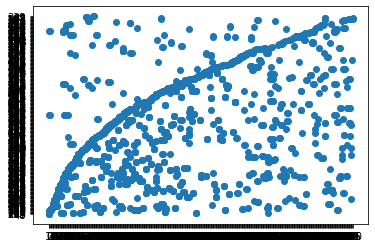

In [42]:
plt.scatter(df_selection['column'], df_selection['row'])
plt.show()

In [43]:
df.describe()

,frame_id,abs_time,bunch_counter
count,2.094546e+06,2.094546e+06,2.094546e+06
mean,4.401952e+07,2.042116e+09,1.125042e+02
std,3.570488e+07,1.286816e+09,7.150900e+01
min,1.000000e+00,9.022900e+04,0.000000e+00
25%,1.134750e+07,4.198980e+08,4.100000e+01
50%,3.464250e+07,2.519900e+09,1.170000e+02
75%,7.355740e+07,3.616700e+09,1.730000e+02
max,1.294870e+08,4.294940e+09,2.550000e+02


In [44]:
df_frame_id1 = df[df['frame_id']==1.]
df_frame_id1.describe()

,frame_id,abs_time,bunch_counter
count,442.0,4.420000e+02,442.0
mean,1.0,3.949260e+09,54.0
std,0.0,0.000000e+00,0.0
min,1.0,3.949260e+09,54.0
25%,1.0,3.949260e+09,54.0
50%,1.0,3.949260e+09,54.0
75%,1.0,3.949260e+09,54.0
max,1.0,3.949260e+09,54.0


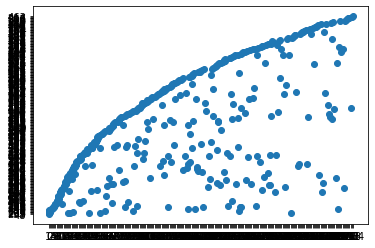

In [45]:
plt.scatter(df_frame_id1['column'], df_frame_id1['row'])
plt.show()